In [2]:
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import easyocr
reader = easyocr.Reader(['en'])

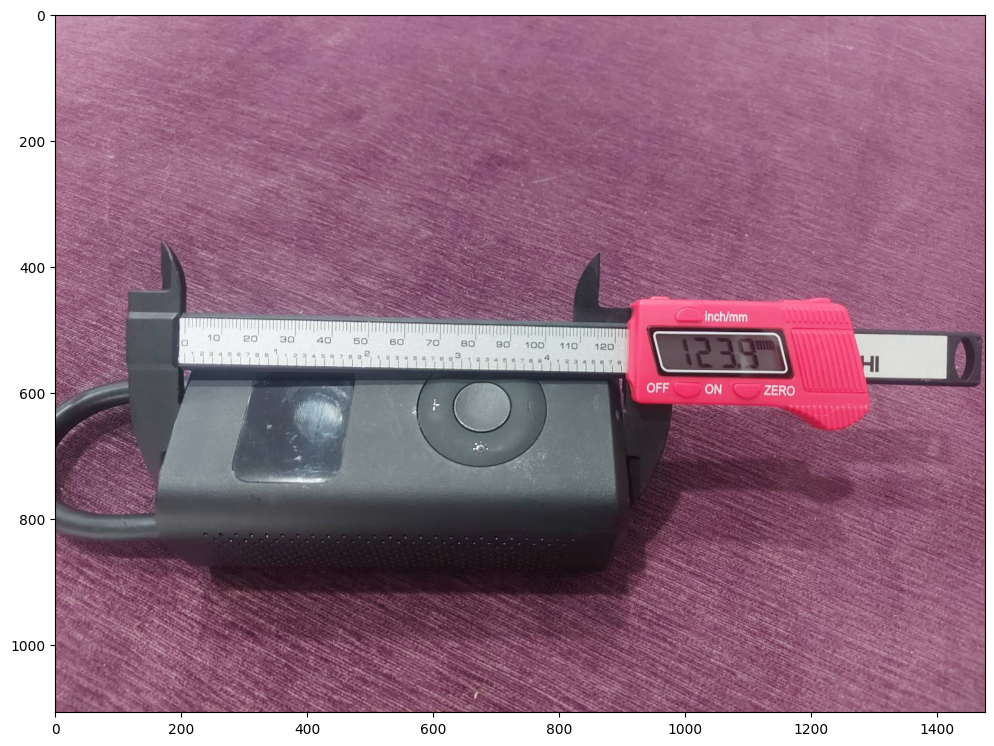

In [3]:
src ="/home/nont/Documents/DL-FOR-COMPUTER-VISION/week03_2/Read_Meter/Data/626518.jpg"

img = cv2.imread(src)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(img)

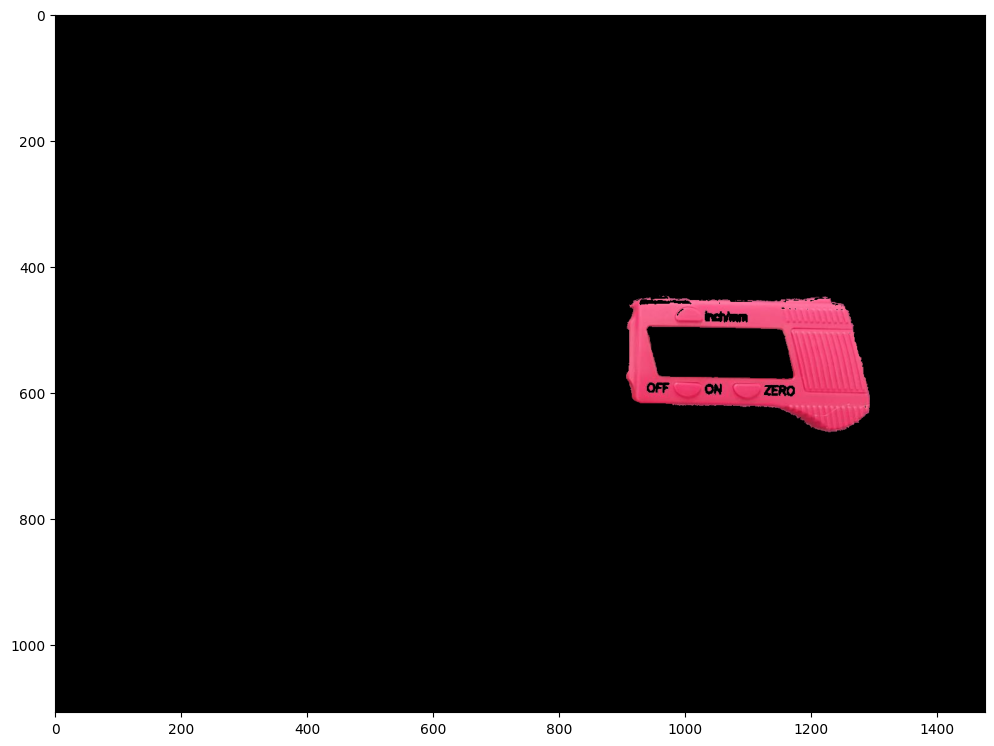

In [5]:
# Load the image
image = img

# Convert the image from BGR to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for neon pink color in HSV
neon_pink_lower = np.array([105, 130, 143])  # Adjust these values according to your specific neon pink color
neon_pink_upper = np.array([132, 255, 255])  # Adjust these values according to your specific neon pink color

# Create a mask to threshold the neon pink color
mask = cv2.inRange(hsv, neon_pink_lower, neon_pink_upper)

# Apply the mask to the original image
segmented_image = cv2.bitwise_and(image, image, mask=mask)

plt.figure(figsize=(12,12))
plt.imshow(segmented_image)


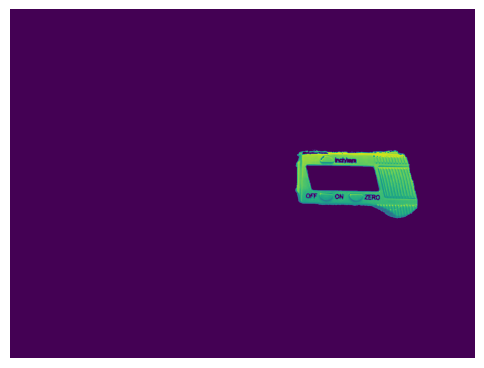

In [6]:
# Convert the segmented image to grayscale
gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6, 6))
plt.imshow(gray)  # Convert BGR to RGB for display
plt.axis('off')
plt.show()

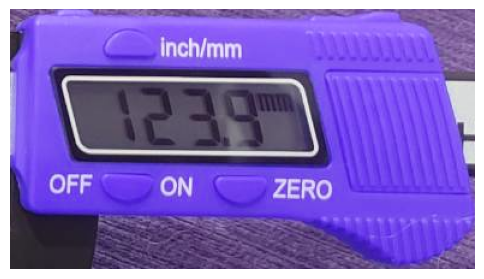

In [7]:
# Find contours on the segmented image
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding box of the largest contour
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the original image using the bounding box obtained from the segmented image
cropped_original_image = image[y:y+h, x:x+w]

# Display the cropped original image
plt.figure(figsize=(6, 6))
plt.imshow(cropped_original_image[:,:,::-1])  # Convert BGR to RGB for display
plt.axis('off')
plt.show()

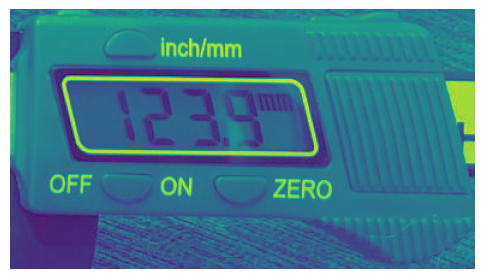

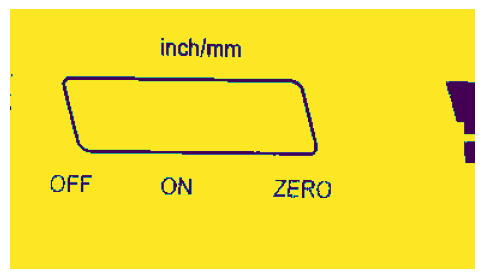

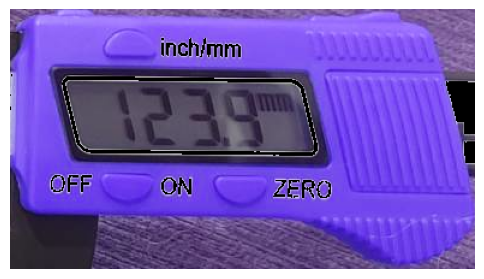

In [8]:
# Convert the cropped image to grayscale
cropped_gray = cv2.cvtColor(cropped_original_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6, 6))
plt.imshow(cropped_gray)  # Convert BGR to RGB for display
plt.axis('off')
plt.show()

# Threshold to obtain a binary image for white color
_, binary_white = cv2.threshold(cropped_gray, 200, 255, cv2.THRESH_BINARY)

# Invert the binary image to create a mask for the white region
mask_white = cv2.bitwise_not(binary_white)
plt.figure(figsize=(6, 6))
plt.imshow(mask_white)  # Convert BGR to RGB for display
plt.axis('off')
plt.show()
# Apply the mask to the cropped image to segment the white region
segmented_white = cv2.bitwise_and(cropped_original_image, cropped_original_image, mask=mask_white)

# Display the segmented white region
plt.figure(figsize=(6, 6))
plt.imshow(segmented_white[:,:,::-1])  # Convert BGR to RGB for display
plt.axis('off')
plt.show()

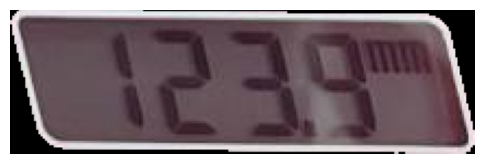

In [9]:

# Convert the cropped image to grayscale
cropped_gray = cv2.cvtColor(cropped_original_image, cv2.COLOR_BGR2GRAY)

# Threshold to obtain a binary image for white color
_, binary_white = cv2.threshold(cropped_gray, 200, 255, cv2.THRESH_BINARY)

# Find contours on the binary image
contours, _ = cv2.findContours(binary_white, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour
largest_contour = max(contours, key=cv2.contourArea)

# Create a mask for the largest contour
mask_largest_contour = np.zeros_like(binary_white)
cv2.drawContours(mask_largest_contour, [largest_contour], -1, (255), thickness=cv2.FILLED)



# Bitwise AND operation to mask the largest contour
masked_image_largest_contour = cv2.bitwise_and(cropped_original_image, cropped_original_image, mask=mask_largest_contour)

# Find bounding box of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the inside region of the largest contour
cropped_inside_region = masked_image_largest_contour[y:y+h, x:x+w]

# Display the cropped inside region
plt.figure(figsize=(6, 6))
plt.imshow(cropped_inside_region) 
# plt.imshow(cropped_inside_region[:,:,::-1])  # Convert BGR to RGB for display
plt.axis('off')
plt.show()

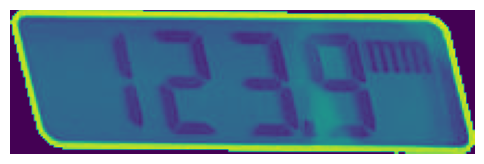

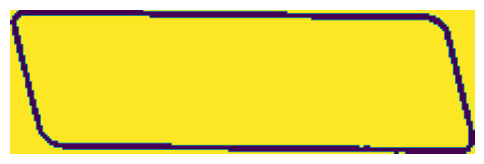

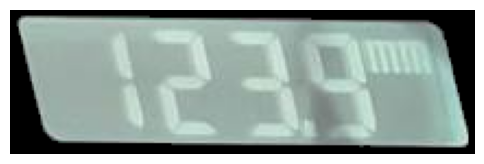

In [12]:
# Convert the cropped image to grayscale
crop_cropped_inside_region = cv2.cvtColor(cropped_inside_region, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6, 6))
plt.imshow(crop_cropped_inside_region)  # Convert BGR to RGB for display
plt.axis('off')
plt.show()

# # Threshold to obtain a binary image for white color
_, bi = cv2.threshold(crop_cropped_inside_region, 200, 255, cv2.THRESH_BINARY)

# # Invert the binary image to create a mask for the white region
mask_bi = cv2.bitwise_not(bi)

result_image = np.ones_like(crop_cropped_inside_region) * 255  # 255 represents white color

plt.figure(figsize=(6, 6))
plt.imshow(mask_bi)  # Convert BGR to RGB for display
plt.axis('off')
plt.show()
# # Apply the mask to the cropped image to segment the white region
segmented_white = cv2.bitwise_and(cropped_inside_region, cropped_inside_region, mask=mask_bi)
segmented_white = segmented_white *255
# segmented_white = cropped_inside_region *255# 255 represents white color

# # Display the segmented white region
plt.figure(figsize=(6, 6))
plt.imshow(segmented_white)  # Convert BGR to RGB for display
plt.axis('off')
plt.show()

109
220


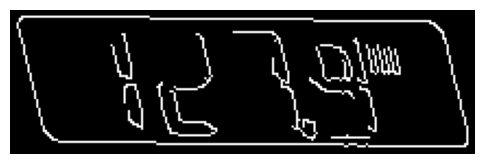

In [13]:
def autoCanny(image):
  # Finds optimal thresholds based on median image pixel intensity
  blurred_img = cv2.blur(image, ksize=(5,5))
  med_val = np.median(image) 
  lower = int(max(0, 0.66 * med_val))
  print(lower)
  upper = int(min(255, 1.33 * med_val))
  print(upper)
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

auto_canny = autoCanny(segmented_white)

plt.figure(figsize=(6, 6))
plt.imshow(auto_canny, cmap='gray')
plt.axis('off')
plt.show()

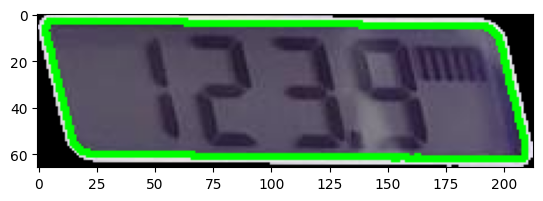

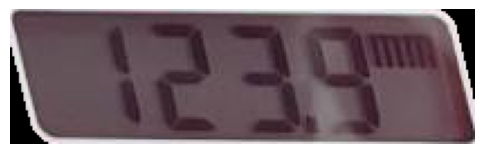

In [14]:
cnts,_ = cv2.findContours(auto_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #

len(cnts)
rgb = cv2.cvtColor(cropped_inside_region, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnts, -1, (0, 255, 0), 2)

plt.imshow(rgb)
plt.show()

largest_contour = max(cnts, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)
cropped_inside_region = cropped_inside_region[y:y+h, x:x+w]

# Display the cropped inside region
plt.figure(figsize=(6, 6))
plt.imshow(cropped_inside_region) 
# plt.imshow(cropped_inside_region[:,:,::-1])  # Convert BGR to RGB for display
plt.axis('off')
plt.show()

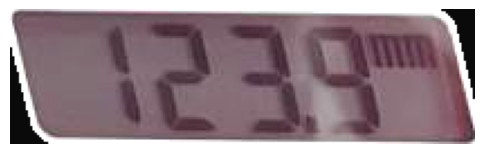

In [15]:
l_channel = cv2.addWeighted(cropped_inside_region, 1.2, np.zeros_like(cropped_inside_region), 0, 10)
plt.figure(figsize=(6, 6))
plt.imshow(l_channel)
plt.axis('off')
plt.show()

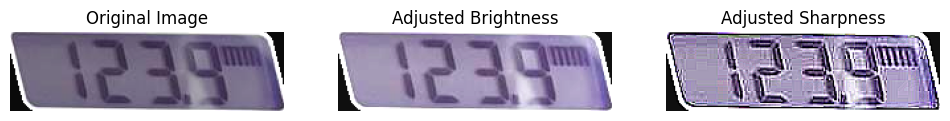

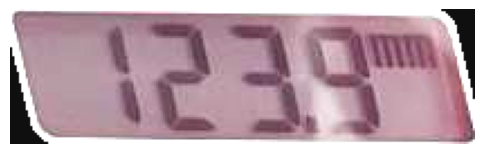

In [16]:
# ปรับความสว่างของภาพ
brightness_factor = 1.4  # ปรับค่าตามต้องการ
brightened_image = cv2.convertScaleAbs(l_channel, alpha=brightness_factor, beta=1)

# ปรับความคมชัดของภาพ
sharpening_filter = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])  # ใช้ filter สำหรับ sharpening
sharpened_image = cv2.filter2D(brightened_image, -1, sharpening_filter)

# แสดงผลภาพ
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(l_channel, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(brightened_image, cv2.COLOR_BGR2RGB))
plt.title('Adjusted Brightness')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Adjusted Sharpness')
plt.axis('off')

plt.show()


plt.figure(figsize=(6, 6))
plt.imshow(brightened_image, cmap='gray')
plt.axis('off')
plt.show()

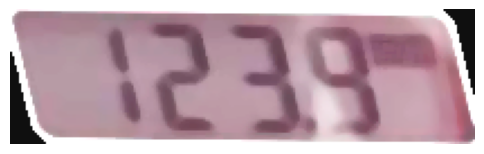

In [17]:
def median_blur(image, ksize = 9):
    return cv2.medianBlur(image, ksize)

image_med=median_blur(brightened_image, 5)
plt.figure(figsize=(6, 6))
plt.imshow(image_med, cmap='gray')
plt.axis('off')
plt.show()

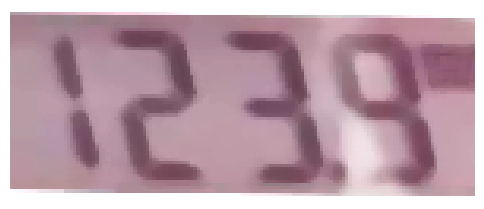

In [18]:
# Define the desired cropping size
crop_width = 30  # Number of pixels to be cropped from each side

# Get the image dimensions
height, width, channels = image.shape

# Crop the image
cropped_image = image_med[:, crop_width:width-crop_width*2]
cropped_image = cropped_image[:, :-crop_width]

# Display the original and cropped images
plt.figure(figsize=(6, 6))
plt.imshow(cropped_image, cmap='gray')
plt.axis('off')
plt.show()

In [19]:
bounds = reader.readtext(cropped_image)
bounds[0][1]

'1239'

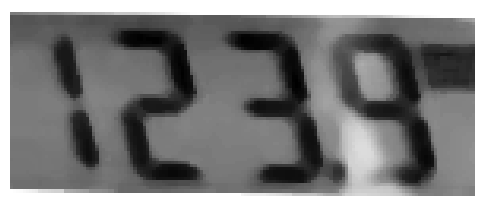

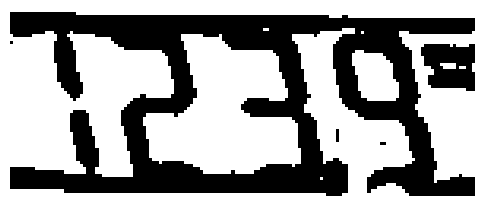

In [20]:
# Convert the cropped region to grayscale
gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6, 6))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

# Apply adaptive thresholding to make the numbers black and the background white
thresholded = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 5)

# Invert the thresholded image
thresholded = cv2.bitwise_not(thresholded)


# Display the thresholded image with detected text
plt.figure(figsize=(6, 6))
plt.imshow(thresholded, cmap='gray')
plt.axis('off')
plt.show()

In [21]:
def adaptive_mean_thresholding(img, max_Value=255, blok_size=11, C_dst=2):
    th = cv2.adaptiveThreshold(img, max_Value, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blok_size, C_dst)
    
    return th

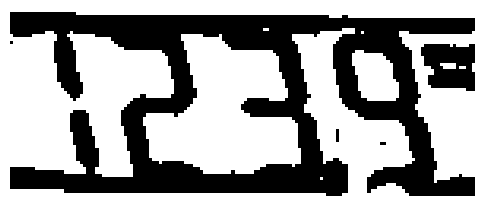

(60, 147)

In [25]:
# Apply adaptive thresholding to make the numbers black and the background white
thresholded = cv2.adaptiveThreshold(thresholded, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 5)

# Invert the thresholded image
thresholded = cv2.bitwise_not(thresholded)



# Display the thresholded image with detected text
plt.figure(figsize=(6, 6))
plt.imshow(thresholded, cmap='gray')
plt.axis('off')
plt.show()
thresholded.shape

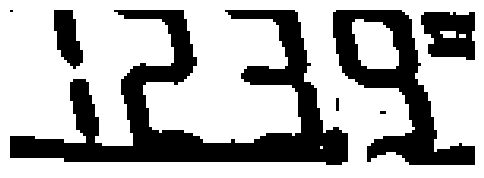

In [23]:
x, y, w, h = 0, 10, thresholded.shape[1], thresholded.shape[0] - 10  # Adjust the '10' value to crop more or less from the top

# Crop the image
cropped_image_height = thresholded[y:y+h, x:x+w]

# Display the original and cropped images
plt.figure(figsize=(6, 6))
plt.imshow(cropped_image_height, cmap='gray')
plt.axis('off')
plt.show()

In [27]:
bounds = reader.readtext(cropped_image_height)
bounds[0][1]

'8c39'

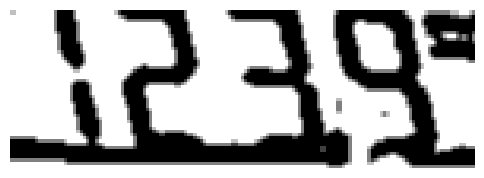

In [28]:
blurred_img_th = cv2.blur(cropped_image_height, ksize=(2,2))

# Display the original and cropped images
plt.figure(figsize=(6, 6))
plt.imshow(blurred_img_th, cmap='gray')
plt.axis('off')
plt.show()

In [29]:
bounds = reader.readtext(blurred_img_th)
bounds[0][1]

'K34'

-----